# LIGHT GBM CLASSIFIER - TEST

In [32]:
import numpy as np
from sklearn import datasets
import lightgbm as lgb
import pandas as pd
from datetime import datetime
import psutil

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns

### FUNCTIONS

In [33]:
def plot_roc_curve(y_true, y_score):
    logit_roc_auc = roc_auc_score(y_true, y_score)
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    plt.figure()
    plt.plot(fpr, tpr, label='Xgboost (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    pass

In [3]:
def plot_score_dist(y_true, y_score):
    
    df = pd.DataFrame(data=np.column_stack((y_true, y_score)), columns=['target','score'])
    
    plt.figure(figsize=(7, 4))
    ax = sns.boxplot(x="target", y="score", data=df)
    ax.set_title("Score distribution")

    pass

### GLOBAL VARIABLES

In [4]:
DATAPATH = '../data/train_test/'
SEED = 47
NITER = 100
CV = 5
SCORE = 'roc_auc'
usenull = True
NJOBS = psutil.cpu_count()

### LOAD DATA

In [5]:
X_train = np.load(DATAPATH+'X_train.npy', allow_pickle=True)

In [6]:
train_tfidf_svd300 = np.load(DATAPATH+'X_train_tfidf_svd300.npy')

In [7]:
X_train = np.concatenate((X_train, train_tfidf_svd300), axis=1)

In [8]:
X_test = np.load(DATAPATH+'X_test.npy', allow_pickle=True)

In [9]:
test_tfidf_svd300 = np.load(DATAPATH+'X_test_tfidf_svd300.npy')

In [10]:
X_test = np.concatenate((X_test, test_tfidf_svd300), axis=1)

In [11]:
y_train = np.load(DATAPATH+'y_train.npy')

In [12]:
y_test = np.load(DATAPATH+'y_test.npy')

In [13]:
feature_names = np.load('../data/train_test/features_list_v001.npy').tolist()

In [14]:
# add list of column names from tfidf features
feature_names += ['svd{0}'.format(i) for i in range(train_tfidf_svd300.shape[1])]

In [ ]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(data=X_train, label=y_train, feature_name= feature_names)

In [ ]:
lgb_test = lgb.Dataset(X_test)

### TRAIN MODEL

In [16]:
model_param = np.load('../models/rseach_gbm_classifier_bestparams_d2019-10-30.npy',allow_pickle=True).tolist()

In [17]:
model_param['num_threads'] = NJOBS

In [18]:
model_param

{'subsample': 0.8,
 'reg_lambda': 0.5,
 'reg_alpha': 0.001,
 'min_data_in_leaf': 180,
 'max_depth': 9,
 'learning_rate': 0.01,
 'gamma': 0.4,
 'colsample_bytree': 0.7,
 'bagging_freq': 20,
 'num_threads': 56}

In [21]:
lgbmodel = lgb.train(model_param, lgb_train)

In [22]:
y_pred = lgbmodel.predict(X_test)

### MODEL RESULT

In [23]:
print(SCORE, ' : ', roc_auc_score(y_test,y_pred))

roc_auc  :  0.7563119737957076


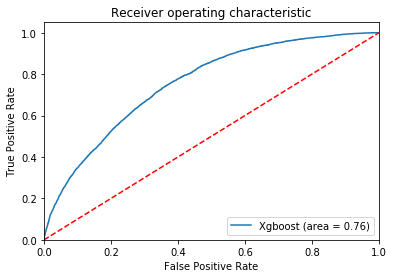

In [34]:
plot_roc_curve(y_test,y_pred)

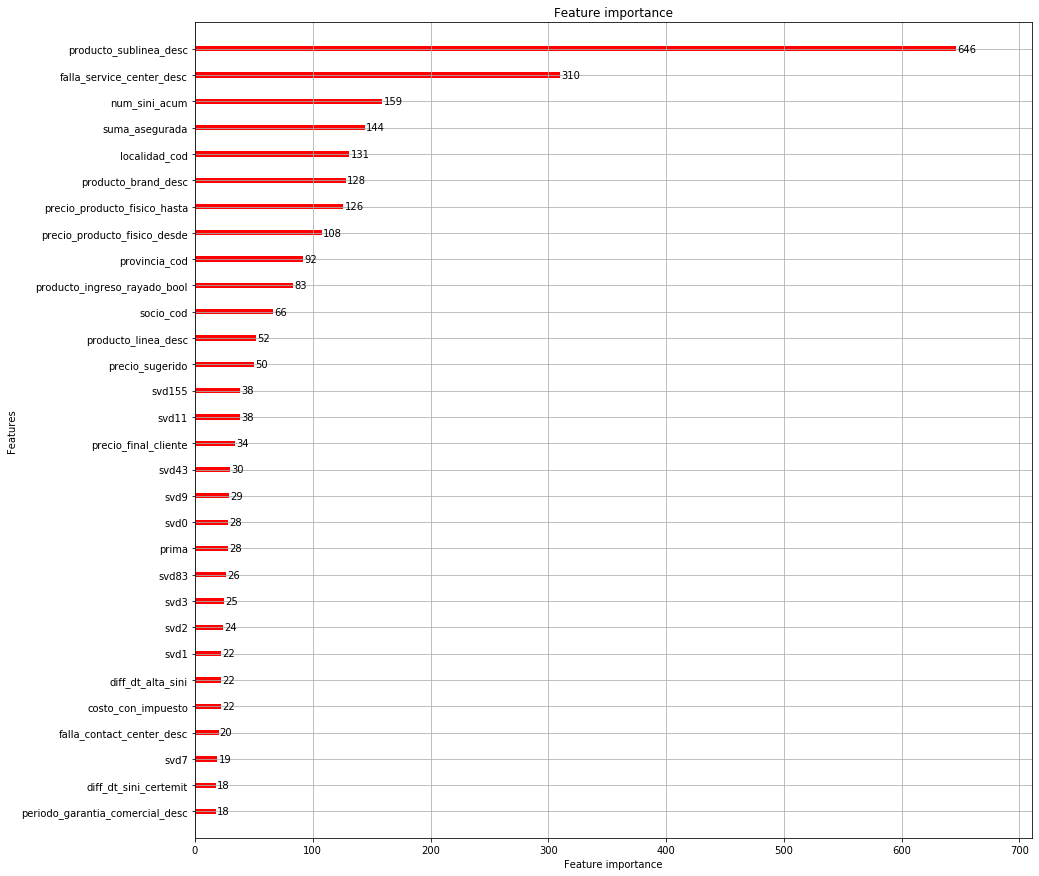

In [25]:
lgb.plot_importance(booster=lgbmodel, figsize=(15,15), max_num_features=30, color='red')
pass

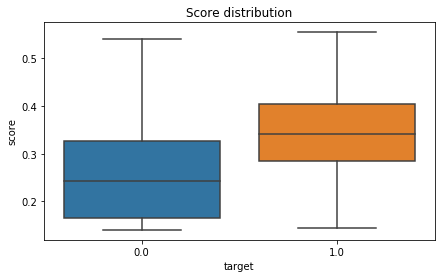

In [26]:
plot_score_dist(y_test, y_pred)